<h3>Importing Libraries</h3>

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<h3>Defining Data-paths & Image Diminsions</h3>

In [2]:
# Define the paths for the dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Image dimensions
img_width, img_height = 150, 150
batch_size = 32
num_classes = 4

<h3>Data Augmentation</h3>

In [3]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Just normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3348 images belonging to 4 classes.
Found 840 images belonging to 4 classes.


<h3>CNN MODEL</h3>

In [4]:
# Building the CNN model
CNN = Sequential()

CNN.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(128, (3, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(num_classes, activation='softmax'))


C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
# Compile the model
CNN.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Model summary
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=25
)

Epoch 1/25


C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 69s 621ms/step - accuracy: 0.5530 - loss: 1.0620 - val_accuracy: 0.8281 - val_loss: 0.4285
Epoch 2/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.9062 - loss: 0.1930 - val_accuracy: 0.8750 - val_loss: 0.2122
Epoch 3/25


C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


104/104 ━━━━━━━━━━━━━━━━━━━━ 49s 463ms/step - accuracy: 0.8066 - loss: 0.4874 - val_accuracy: 0.8197 - val_loss: 0.4520
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9062 - loss: 0.1536 - val_accuracy: 0.7500 - val_loss: 0.1887
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 49s 463ms/step - accuracy: 0.8136 - loss: 0.4817 - val_accuracy: 0.8474 - val_loss: 0.3550
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.9000 - loss: 0.1821 - val_accuracy: 1.0000 - val_loss: 0.1257
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 50s 468ms/step - accuracy: 0.8460 - loss: 0.3713 - val_accuracy: 0.8654 - val_loss: 0.3278
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8125 - loss: 0.2063 - val_accuracy: 1.0000 - val_loss: 0.0750
Epoch 9/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 51s 478ms/step - accuracy: 0.8328 - loss: 0.3658 - val_accuracy: 0.8810 - val_loss: 0.2717
Epoch 10/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8750 - loss: 0.0798 - val_ac

In [10]:
# Save the model
CNN.save('plant_disease_classification_model.h5')

# Evaluate the model
test_loss, test_accuracy = CNN.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy:.2f}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.8765 - loss: 0.2484
Test Accuracy: 0.87


<h3>Results of CNN Model</h3>

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step


<Figure size 1000x800 with 0 Axes>

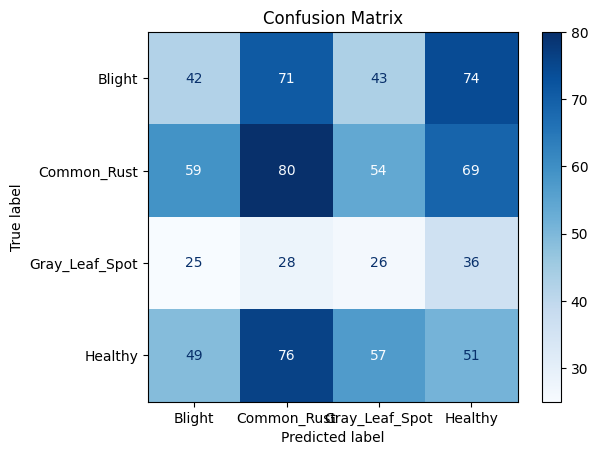

In [15]:
# import numpy as np
# Predict the classes on the test set
Y_pred = CNN.predict(test_generator, steps=test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

<h3>ANN MODEL & RESULTS</h3>

C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,692,868 (132.34 MB)

 Trainable params: 34,692,868 (132.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 595ms/step - accuracy: 0.3990 - loss: 18.3842 - val_accuracy: 0.5673 - val_loss: 0.9952
Epoch 2/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 0.6004 - val_accuracy: 0.6250 - val_loss: 0.3393
Epoch 3/25


C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


104/104 ━━━━━━━━━━━━━━━━━━━━ 60s 566ms/step - accuracy: 0.5129 - loss: 1.1140 - val_accuracy: 0.4904 - val_loss: 1.0895
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.4062 - loss: 0.6534 - val_accuracy: 0.3750 - val_loss: 0.4074
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 604ms/step - accuracy: 0.5050 - loss: 1.0564 - val_accuracy: 0.5505 - val_loss: 0.9451
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.5938 - loss: 0.4794 - val_accuracy: 0.6250 - val_loss: 0.3552
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 63s 598ms/step - accuracy: 0.4797 - loss: 1.0707 - val_accuracy: 0.5469 - val_loss: 0.9345
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6250 - loss: 0.4468 - val_accuracy: 0.3750 - val_loss: 0.4628
Epoch 9/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 67s 628ms/step - accuracy: 0.4659 - loss: 1.0940 - val_accuracy: 0.5457 - val_loss: 0.9411
Epoch 10/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.5000 - loss: 0.4942 - val_ac

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5563 - loss: 0.9344
Test Accuracy: 0.55
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


<Figure size 1000x800 with 0 Axes>

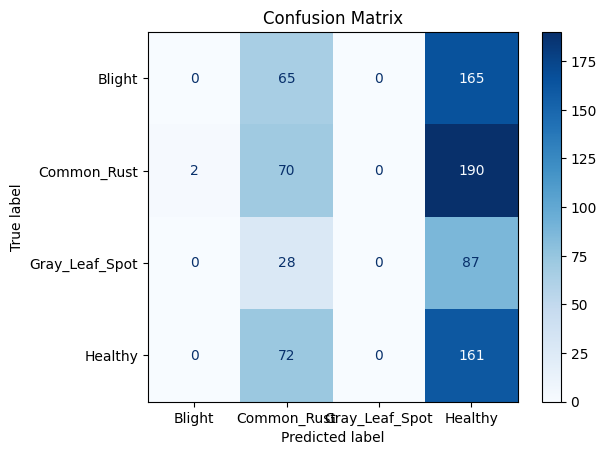

In [16]:
# Building the ANN model
model = Sequential()

model.add(Flatten(input_shape=(img_width, img_height, 3)))  # Flatten the input image
model.add(Dense(512, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))  # Another fully connected layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=25
)

# Save the model
model.save('plant_disease_classification_ann_model.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict the classes on the test set
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

<h3>Transfer Learning Using MobileNet & Results </h3>

C:\Users\ghula\AppData\Local\Temp\ipykernel_14288\3576748157.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 270s 16us/step


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 75, 75, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 75, 75, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 75, 75, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 75, 75, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 76, 76, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 37, 37, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 37, 37, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 37, 37, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 37, 37, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 37, 37, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 59s 527ms/step - accuracy: 0.7176 - loss: 0.8358 - val_accuracy: 0.9002 - val_loss: 0.2573
Epoch 2/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.1868 - val_accuracy: 0.8750 - val_loss: 0.0914
Epoch 3/25


C:\Users\ghula\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


104/104 ━━━━━━━━━━━━━━━━━━━━ 53s 494ms/step - accuracy: 0.8802 - loss: 0.3201 - val_accuracy: 0.9147 - val_loss: 0.2149
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8438 - loss: 0.1305 - val_accuracy: 0.8750 - val_loss: 0.1379
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 50s 464ms/step - accuracy: 0.9028 - loss: 0.2474 - val_accuracy: 0.9075 - val_loss: 0.2232
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0962 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 49s 459ms/step - accuracy: 0.9071 - loss: 0.2401 - val_accuracy: 0.9159 - val_loss: 0.1961
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8750 - loss: 0.1232 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 9/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 51s 476ms/step - accuracy: 0.9160 - loss: 0.2140 - val_accuracy: 0.9231 - val_loss: 0.1884
Epoch 10/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0485 - val_accura

<Figure size 1000x800 with 0 Axes>

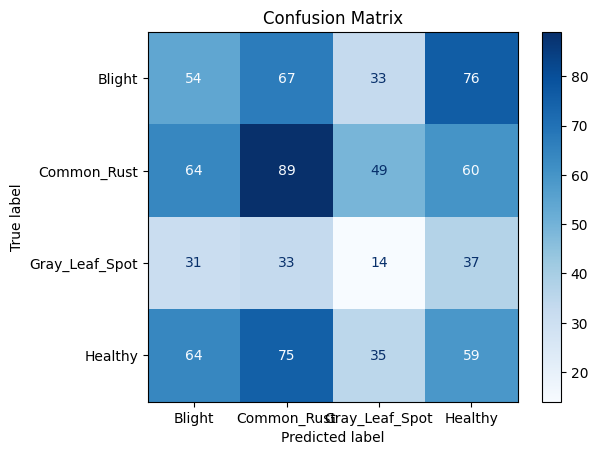

In [18]:
# Load the MobileNet model pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the complete model
TF= Model(inputs=base_model.input, outputs=predictions)

# Compile the model
TF.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
TF.summary()

# Train the model
TF.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=25
)

# Save the model
# TF.save('plant_disease_classification_mobilenet_model.h5')

# Evaluate the model
test_loss, test_accuracy = TF.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict the classes on the test set
Y_pred = TF.predict(test_generator, steps=test_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()